<div class="alert">
<div style="direction:ltr;text-align:center;font-family: B Tahoma; font-size:24pt"> Practical Deep Learning Course for Computer Vision
</div>
</div>

<div class="alert">
<div style="direction:ltr;text-align:left;font-family:Tahoma; font-size:16pt"> Perceptron
</div>
</div>

<img src="./images/perceptron_schematic_overview.png" alt="Perceptron Schematic">
<a href="http://ataspinar.com/wp-content/uploads/2016/11/perceptron_schematic_overview.png">Reference</a>

<div style="direction:ltr;text-align:left;font-family: Tahoma">
Import the required libraries.<br>
</div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.utils import shuffle

<div style="direction:ltr;text-align:left;font-family: Tahoma">
Load the dataset and select only 2 classes from the dataset (class 6 -> Shirt , class 8 -> bag):
</div>

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

x_train = np.concatenate((x_train[y_train == 6][:100], x_train[y_train == 8][:100]))
x_test = np.concatenate((x_test[y_test == 6][:25], x_test[y_test == 8][:25]))

y_train = np.concatenate((y_train[y_train == 6][:100], y_train[y_train == 8][:100]))
y_test = np.concatenate((y_test[y_test == 6][:25], y_test[y_test == 8][:25]))

y_train[y_train == 6] = 0.0
y_train[y_train == 8] = 1.0

y_test[y_test == 6] = 0.0
y_test[y_test == 8] = 1.0

<div style="direction:ltr;text-align:left;font-family: Tahoma">
Shuffle the dataset:
</div>

In [3]:
x_train, y_train = shuffle(x_train, y_train, random_state=0)

In [4]:
x_test, y_test = shuffle(x_test, y_test, random_state=0)

<div style="direction:ltr;text-align:left;font-family: Tahoma">
Displaying the dataset:
</div>

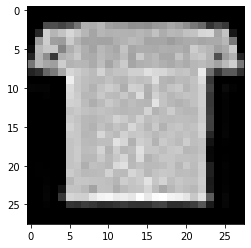

In [5]:
plt.imshow(x_train[y_train == 0][0], cmap='gray')

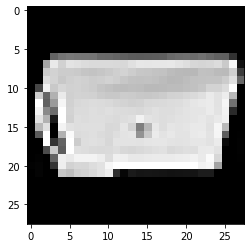

In [6]:
plt.imshow(x_train[y_train == 1][1], cmap='gray')

<div style="direction:ltr;text-align:left;font-family: Tahoma">
Normalize the dataset between 0 and 1:
</div>

In [7]:
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# Make sure images have shape (784,)
x_train = x_train.reshape(len(x_train), -1)
x_test = x_test.reshape(len(x_test), -1)

print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

x_train shape: (200, 784)
200 train samples
50 test samples


<div style="direction:ltr;text-align:left;font-family: Tahoma">
Defining the classifier:
</div>

In [8]:
model = tf.keras.Sequential([tf.keras.layers.Dense(1, activation='sigmoid', input_shape=(784,))])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 785       
Total params: 785
Trainable params: 785
Non-trainable params: 0
_________________________________________________________________


In [10]:
loss = tf.keras.losses.BinaryCrossentropy()
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-4)

In [11]:
model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])

<div style="direction:ltr;text-align:left;font-family: Tahoma">
Fitting the classifier:
</div>

In [12]:
model.fit(x_train, y_train, batch_size=32, epochs=40)

Train on 200 samples
Epoch 1/40
200/200 [==============================] - 1s 4ms/sample - loss: 0.6784 - accuracy: 0.5300
Epoch 2/40
200/200 [==============================] - 0s 165us/sample - loss: 0.6388 - accuracy: 0.6500
Epoch 3/40
200/200 [==============================] - 0s 160us/sample - loss: 0.6126 - accuracy: 0.7250
Epoch 4/40
200/200 [==============================] - 0s 160us/sample - loss: 0.5898 - accuracy: 0.7750
Epoch 5/40
200/200 [==============================] - 0s 150us/sample - loss: 0.5700 - accuracy: 0.8300
Epoch 6/40
200/200 [==============================] - 0s 155us/sample - loss: 0.5513 - accuracy: 0.8600
Epoch 7/40
200/200 [==============================] - 0s 150us/sample - loss: 0.5335 - accuracy: 0.8750
Epoch 8/40
200/200 [==============================] - 0s 145us/sample - loss: 0.5164 - accuracy: 0.8900
Epoch 9/40
200/200 [==============================] - 0s 145us/sample - loss: 0.5011 - accuracy: 0.9000
Epoch 10/40
200/200 [========================

In [13]:
model.weights

[<tf.Variable 'dense/kernel:0' shape=(784, 1) dtype=float32, numpy=
 array([[-6.08958229e-02],
        [-2.58083828e-02],
        [-6.63710609e-02],
        [-8.69561285e-02],
        [ 2.43796054e-02],
        [ 2.87993960e-02],
        [-2.20099669e-02],
        [ 2.61364952e-02],
        [ 3.15929167e-02],
        [ 2.91697904e-02],
        [-9.39342082e-02],
        [ 3.14983465e-02],
        [-6.50876574e-03],
        [-9.44679826e-02],
        [-7.91367143e-02],
        [ 1.59671195e-02],
        [-5.80041483e-02],
        [-7.25566447e-02],
        [-5.75488545e-02],
        [-6.10893667e-02],
        [-3.66546400e-02],
        [-6.70692623e-02],
        [ 9.83714089e-02],
        [ 2.13853922e-02],
        [-4.11233082e-02],
        [-6.66469336e-02],
        [ 1.71585679e-02],
        [-1.72565952e-02],
        [ 4.89582270e-02],
        [ 5.07164299e-02],
        [ 2.73344629e-02],
        [ 2.72401106e-02],
        [-3.93420570e-02],
        [-5.57671562e-02],
        [ 3.23

<div style="direction:ltr;text-align:left;font-family: Tahoma">
Evaluating the classifier:
</div>

In [14]:
loss, accuracy = model.evaluate(x_test, y_test)
print("Accuracy is %.2f %%" %(accuracy * 100))

50/50 [==============================] - 0s 2ms/sample - loss: 0.2547 - accuracy: 0.9200
Accuracy is 92.00 %


<div style="direction:ltr;text-align:left;font-family: Tahoma">
Predicting with the classifier:
</div>

In [15]:
sample = 20

X = np.expand_dims(x_test[sample], axis=0)

predicted_class = model.predict_classes(X).squeeze()
predicted_probability = model.predict(X).squeeze()
actual_class = y_test[sample]

print ("The actual label: {} \nThe predicted label: {} \nThe probablity: {}".format(actual_class, 
                                                                                    predicted_class, 
                                                                                    predicted_probability))

The actual label: 0 
The predicted label: 0 
The probablity: 0.41556209325790405


<div class="alert">
<div style="direction:ltr;text-align:left;font-family:B Tahoma"> Practical Deep Learning Course for Computer Vision
<br>Vahid Reza Khazaie<br>
</div>
<a href="https://www.linkedin.com/in/vahidrezakhazaie/">LinkedIn</a> - <a href="https://github.com/vrkh1996">GitHub</a>

</div>